# Modelos de Regresión Lineal
## Modelo con datos simulados

* $y = a + b*x$

* x : 100 valores distribuidos según una N(1.5,2.5)

* $Ye = 7+1.6*x + e$

* e estará distribuida según una N(0,0.8)

In [39]:
import pandas as pd
import numpy as np

In [40]:
x = 1.5 + (2.5 *np.random.randn(100))

In [41]:
res = 0+(.8*np.random.randn(100))

In [42]:
y_pred = 7 + 1.6 * x

In [43]:
y_act = 7 + 1.6 *x +res

In [44]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [45]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y":y_act_list,
        "y_pred":y_pred_list
    }

)

In [46]:
data.head()

,x,y,y_pred
0,-1.825740,4.036065,4.078816
1,3.286109,12.045002,12.257774
2,-2.452141,2.618430,3.076575
3,-0.810701,5.663086,5.702879
4,2.189250,10.481152,10.502800


In [71]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)]

In [48]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Valor Actual vs Predicción')

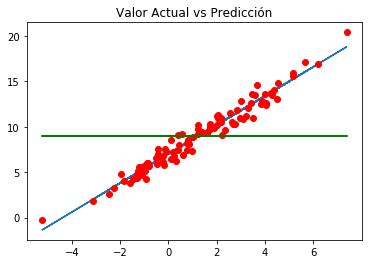

In [49]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor Actual vs Predicción")

In [50]:
data["SSR"] = (data["y_pred"]-np.mean(y_act))**2
data["SSD"] = (data["y_pred"]-data["y"])**2
data["SST"] = (data["y"]-np.mean(y_act))**2

In [51]:
data.head()

,x,y,y_pred,SSR,SSD,SST
0,-1.825740,4.036065,4.078816,24.040317,0.001828,24.461377
1,3.286109,12.045002,12.257774,10.731289,0.045272,9.382537
2,-2.452141,2.618430,3.076575,34.872975,0.209897,40.493870
3,-0.810701,5.663086,5.702879,10.752040,0.001583,11.014589
4,2.189250,10.481152,10.502800,2.313111,0.000469,2.247729


In [52]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [53]:
SSR

1279.182075878938

In [54]:
SSD

53.417063307066215

In [55]:
SST

1334.1396810145827

In [56]:
SSR+SSD

1332.599139186004

In [57]:
R2 = SSR/SST

In [58]:
R2

0.9588067082347398

(array([ 2.,  5.,  8., 11., 23., 20.,  9.,  9., 11.,  2.]),
 array([-1.80567295, -1.46474821, -1.12382346, -0.78289872, -0.44197397,
        -0.10104923,  0.23987552,  0.58080026,  0.921725  ,  1.26264975,
         1.60357449]),
 <a list of 10 Patch objects>)

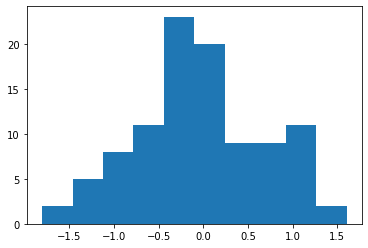

In [59]:
plt.hist(data["y_pred"]-data["y"])

## Obteniendo la recta de regresión

* $y = a+b*x$
* $b = sum((xi-x_m)(yi-y_m))/sum((xi-x_m)^2)$
* $a = y_m - b *x_m$

In [60]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y"])
x_mean, y_mean

(1.2191364199557175, 8.98190895348324)

In [61]:
data["beta_n"] = (data["x"]-x_mean)*(data["y"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [62]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [63]:
alpha = y_mean - beta * x_mean

In [64]:
alpha, beta

(7.029966694503119, 1.601086004018337)

El modelo lineal obtenido por regresión es: y = 6.8270980229042575 + 1.6395249357736048*x

In [65]:
data["y_model"] = 6.8270980229042575 + 1.6395249357736048*data["x"]

In [66]:
data.head()

,x,y,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,-1.825740,4.036065,4.078816,24.040317,0.001828,24.461377,15.059484,9.271271,3.833752
1,3.286109,12.045002,12.257774,10.731289,0.045272,9.382537,6.331327,4.272374,12.214755
2,-2.452141,2.618430,3.076575,34.872975,0.209897,40.493870,23.362098,13.478277,2.806752
3,-0.810701,5.663086,5.702879,10.752040,0.001583,11.014589,6.736672,4.120240,5.497934
4,2.189250,10.481152,10.502800,2.313111,0.000469,2.247729,1.454436,0.941121,10.416428


In [67]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"] - data["y"])**2)
SST = sum((data["y"] - y_mean)**2)

In [68]:
SSR,SSD,SST

(1345.4931646913992, 56.490609244181, 1334.1396810145827)

In [69]:
R2 = SSR/SST
R2

1.008509966263939

Text(0.5, 1.0, 'Valor Actual vs Predicción')

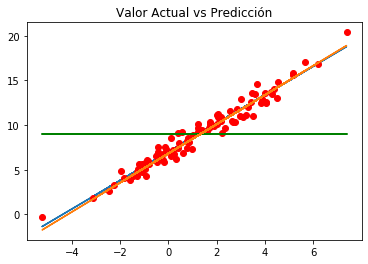

In [72]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [76]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7592330262876666

In [77]:
np.mean(data["y"])

8.98190895348324

In [78]:
RSE / np.mean(data["y"])

0.0845291385405584